In [1]:
from matplotlib import pyplot as plt
from distributed import Client

from egamma_tnp import TagNProbe
from egamma_tnp.utils import get_ratio_histograms

In [2]:
plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Palatino"],
        "xtick.labelsize": 18,
        "ytick.labelsize": 18,
        "legend.numpoints": 1,
        "axes.linewidth": 2,
        "legend.title_fontsize": 16,
        "axes.labelsize": 18,
        "legend.fontsize": 16,
    }
)

In [3]:
%%time
# tag_n_probe = TagNProbe(
#     "/EGamma*/Run2023C-PromptNanoAODv12_v3-v1/NANOAOD",
#     goldenjson="json/Cert_Collisions2023_366442_368823_Golden.json",
#     toquery=True,
#     redirect=False,
#     invalid=False,
# )

tag_n_probe = TagNProbe(
    ["root_files/Egamma0.root", "root_files/Egamma1.root"],
    goldenjson="json/Cert_Collisions2023_366442_368823_Golden.json",
    toquery=False,
    redirect=False,
    invalid=False,
)

tag_n_probe.load_events()
tag_n_probe

CPU times: user 862 ms, sys: 311 ms, total: 1.17 s
Wall time: 859 ms


TagNProbe(Events: dask.awkward<from-uproot, npartitions=2>, Number of files: 2, Golden JSON: json/Cert_Collisions2023_366442_368823_Golden.json)

In [4]:
%%time

with Client() as client:
    (
        hpt_pass,
        hpt_all,
        heta_pass,
        heta_all,
    ) = tag_n_probe.get_tnp_histograms(compute=True, scheduler=None, progress=True)

hptratio, hetaratio = get_ratio_histograms(hpt_pass, hpt_all, heta_pass, heta_all)

print(f"Passing probes: {hpt_pass.sum(flow=True)}")
print(f"All probes: {hpt_all.sum(flow=True)}")

[########################################] | 100% Completed | 214.78 ms
Passing probes: 14598.0
All probes: 16896.0
CPU times: user 1.67 s, sys: 154 ms, total: 1.83 s
Wall time: 6.96 s


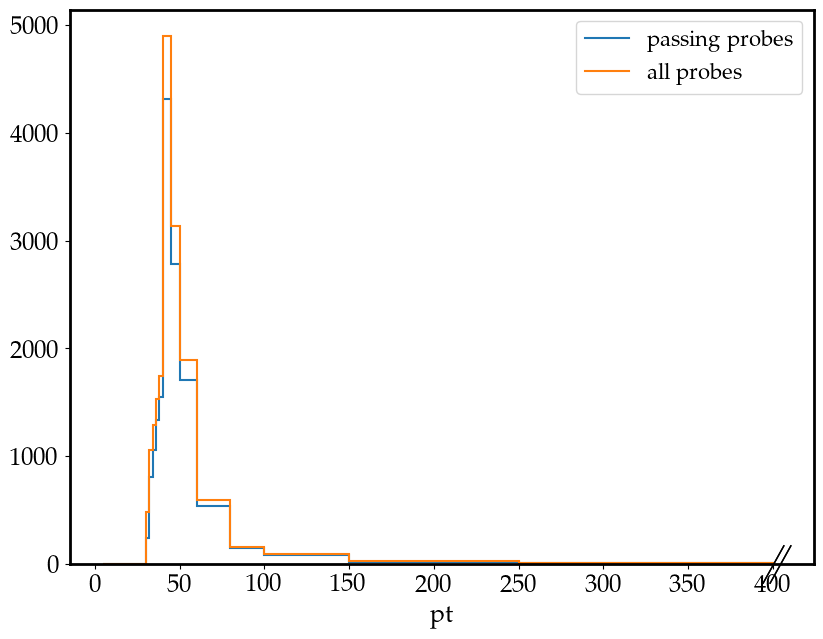

In [5]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
hpt_pass.plot1d(label="passing probes")
hpt_all.plot1d(label="all probes")
plt.legend()
plt.savefig("plots/pt.pdf", bbox_inches="tight")
plt.show()

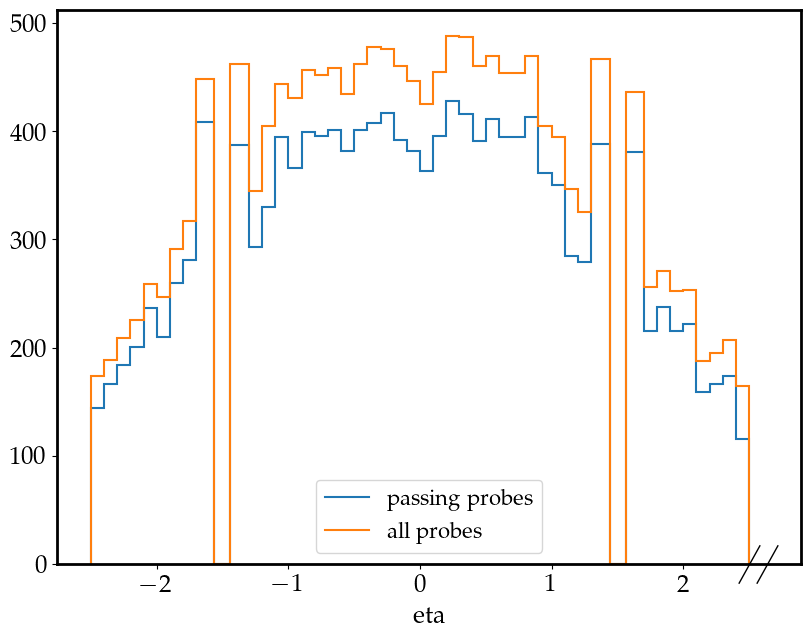

In [6]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
heta_pass.plot1d(label="passing probes")
heta_all.plot1d(label="all probes")
plt.legend()
plt.savefig("plots/eta.pdf", bbox_inches="tight")
plt.show()

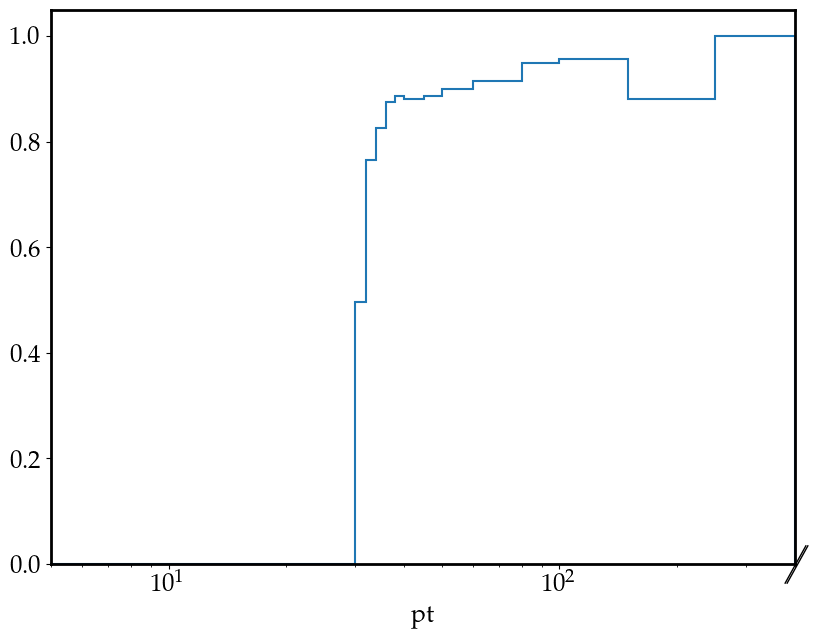

In [7]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
hptratio.plot1d()
plt.xlim(5, 400)
plt.xscale("log")
plt.savefig("plots/eff_pt.pdf", bbox_inches="tight")
plt.show()

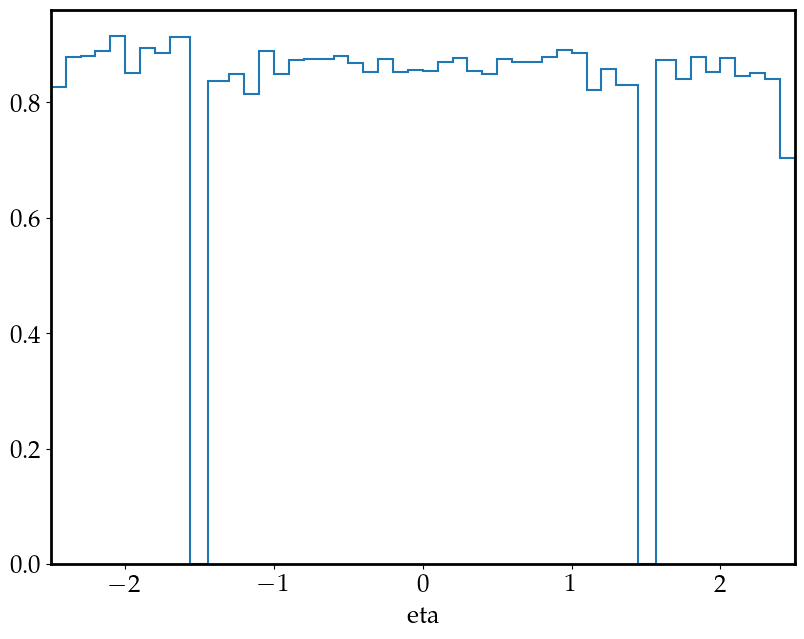

In [8]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
hetaratio.plot1d()
plt.xlim(-2.5, 2.5)
plt.savefig("plots/eff_eta.pdf", bbox_inches="tight")
plt.show()